# Miniproject: Python for Data Science 
## Author: Aura MORENO VEGA
### Dataset: World Development indicators, World Bank


## Step 1: Retrieve dataset

In [1]:
#Import libraries to be used throughout analysis
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Donwload dataset from Kaggle
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

In [3]:
#Import Indicators file
data = pd.read_csv('./world-development-indicators/Indicators.csv')
#Verify dimensions of data
data.shape

(5656458, 6)

In [4]:
#Take a look at the data
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


## Step 2: Define the research question

### What are the unique indicators in the dataset?

In [5]:
#List of the available indicators

#How many unique indicators are there?
indicators = data.IndicatorName.unique()
print('There are %d unique indicators'% len(indicators))

#Export list of indicators to look at individually and use them to define an interesting research question
np.savetxt('uniqueindicators.txt',indicators,fmt='%s')

#I will look at education levels and rate of teenage pregnancies

There are 1344 unique indicators


### What are the unique countries analyzed?

In [6]:
#List of unique country names
countries = data['CountryName'].unique().tolist()

print('There are %d unique countries'% len(countries))

#Export country names to look at individually and define which countries would be compared
np.savetxt('countries.txt',countries,fmt='%s')

#As there are many countries, I will compare groupings of countries: low-income, middle-income and high-income

There are 247 unique countries


### What's the range of years for the analyzed data? 

In [7]:
years = data['Year'].unique().tolist()
print(min(years)," to ",max(years))

1960  to  2015


## Step 3: Analysis of research question: 
## What is the relationship between use of contraception, education level and teenage pregnancies ?

In order to answer to my main research question (Use of contraception and education level), I will explore three different things:

**1. Relationship between use of contraception and adolescent pregnancies**

Although it is expected to be related, need to confirm this inthe dataset. If there is a positive relationship between use of contraception and adolescent pregnancies, then I can analyze the following:

**2. Relationship between primary/secondary education level completion and use of contraception**


### 1. Relationship between use of contraception and adolescent pregnancies

**Create filters of indicators and countries of interest**

In [8]:
#Define indicators related to use of contraception and adolescent pregnancies
indicator_preg = ['Adolescent fertility rate (births per 1,000 women ages 15-19)']
indicator_contra = ['Contraceptive prevalence (% of women ages 15-49)',
                  'Condom use, population ages 15-24, female (% of females ages 15-24)',
                 'Condom use, population ages 15-24, male (% of males ages 15-24)']


indicatorsFilter = indicator_preg + indicator_contra

#Define groups of countries to analyze: high- middle- and low-income countries, choose also World to look at global trend
countries_filt = ['High income', 'Middle income', 'Low income', 'World']

#Filter data based on indicator and country filter, and define a year of analysis

#Define filter mesh:
filterMesh = (data['CountryName'].isin(countries_filt)) & (data['IndicatorName'].isin(indicatorsFilter))
data_filt = data.loc[filterMesh]
data_filt.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1081,High income,HIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,45.280701
1886,Low income,LIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.469447
2275,Middle income,MIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,98.052241
3370,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,86.520285
24431,High income,HIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1961,45.336817


In [9]:
#Double check that filtered indicators are present
data_filt['IndicatorName'].unique().tolist()

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Contraceptive prevalence (% of women ages 15-49)',
 'Condom use, population ages 15-24, female (% of females ages 15-24)',
 'Condom use, population ages 15-24, male (% of males ages 15-24)']

**Choose countries and years for which we have information about adolescent pregnancy rate and one indicator of contraception use**

In [10]:
#Befor plotting, I need to verify the following:

#Do all chosen countries have data for all the indicators?
#Is there data for all the indicators for every year?

#I will explore the data to answer to this two questions and define:
# which countries I can use that have data for all the indicators and for a given year



#First: See for which years is our filtered data available:
years_filt = data_filt['Year'].unique().tolist()
print("Analyzed years in filtered dataset: ",min(years_filt)," to ",max(years_filt))
print("Range of years in filtered dataset: ",len(years_filt))


#There are 55 years analyzed in our filtered dataset
#Now, output a table for each indicator name, group  by Countryname and count values.
#We should expect 55 values for each indicator (as there are 55 years analyzed)

data_count_filt =  data_filt.IndicatorName.groupby(data_filt.CountryName).value_counts() 

print(data_count_filt.head())


###Conclusion of exploration of data:

#1.There is no data on use of contraception for High income countries.

#2. For low income countries, there is information regarding condom use only for one year.

#3. For world, low income and middle income there is information on both adolescent fertility 
#and contraceptive prevalence for at least 3 years

#I will thus analyze adolescent fertility and contraceptive prevalence in low/middle income countries and the world, 
#I need to define now for which years there is such information

Analyzed years in filtered dataset:  1960  to  2014
Range of years in filtered dataset:  55
CountryName  IndicatorName                                                      
High income  Adolescent fertility rate (births per 1,000 women ages 15-19)          55
Low income   Adolescent fertility rate (births per 1,000 women ages 15-19)          55
             Contraceptive prevalence (% of women ages 15-49)                        3
             Condom use, population ages 15-24, female (% of females ages 15-24)     1
             Condom use, population ages 15-24, male (% of males ages 15-24)         1
Name: IndicatorName, dtype: int64


In [11]:
#Define years for which there is information on Contraceptive prevalence
print(data_filt.Year.groupby(data_filt.IndicatorName).value_counts().sort_values(ascending=True).head())

#We see that the years for which we have information on contraceptive prevalence are: 2011, 2000 & 1990
#Very interesting to see that there is no info on contraceptive prevalence for high income countries!

IndicatorName                                                        Year
Condom use, population ages 15-24, female (% of females ages 15-24)  2011    1
Condom use, population ages 15-24, male (% of males ages 15-24)      2011    1
Contraceptive prevalence (% of women ages 15-49)                     2011    3
                                                                     2000    3
                                                                     1990    3
Name: Year, dtype: int64


**Analysis: Adolescent fertility rate vs Contraceptive prevalence in the year 2011**

In [12]:
#Based on previously chosen indicators, countries and years, filter final dataset to plot

#Update filters:
indicator_UD = ['Contraceptive prevalence (% of women ages 15-49)','Adolescent fertility rate (births per 1,000 women ages 15-19)']
countries_filtUD = ['Middle income', 'Low income', 'World']
year_filt= [1990,2000,2011]

#Update filter mesh:
filterMesh = (data['CountryName'].isin(countries_filtUD)) & (data['IndicatorName'].isin(indicator_UD)) & (data['Year'].isin(year_filt))

#Filter data for analysis
data_filt = data.loc[filterMesh]
data_filt.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1888500,Low income,LIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1990,131.817406
1888560,Low income,LIC,Contraceptive prevalence (% of women ages 15-49),SP.DYN.CONU.ZS,1990,17.540813
1890723,Middle income,MIC,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1990,66.789643
1890794,Middle income,MIC,Contraceptive prevalence (% of women ages 15-49),SP.DYN.CONU.ZS,1990,58.564723
1895691,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1990,65.430847


### Plot

Compare Adolescent fertility rate vs contraceptive prevalence for the years 1990, 2000 and 2011. Evaluate results for low-income, middle-income countries, and world. 

Definition of Contraceptive prevalence form the World Health Organization:
"Contraceptive prevalence is the percentage of women who are currently using, or whose sexual partner is currently using, at least one method of contraception, regardless of the method used.It is usually reported for married or in-union women aged 15 to 49."


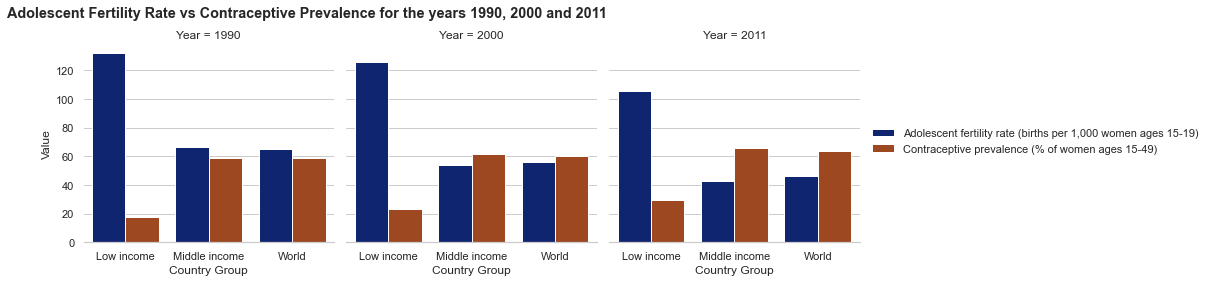

In [13]:
#Use seaborn library as it is easier to plot grouped graphs
import seaborn as sns
sns.set_theme(style="whitegrid")


#Define facet by year (will have an individual plot for each year)
g = sns.FacetGrid(data_filt,
            col='Year',
            sharex=False,
            sharey=True,
            height=4)
#Draw bar plots grouped by Country Name, and color by Indicator Name
g = g.map(sns.barplot, 'CountryName', 'Value', "IndicatorName",
        hue_order=np.unique(data_filt["IndicatorName"]), 
          order=np.unique(data_filt["CountryName"]),
          palette="dark")


# #Layout: Take out y axis line
g.despine(left=True)

#Set axes and legend labels. Set title
g.set_axis_labels("Country Group", "Value")
g.add_legend()
g.legend.set_title("")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Adolescent Fertility Rate vs Contraceptive Prevalence for the years 1990, 2000 and 2011',
               weight='bold',ha='right')
#Save plot as image
plt.savefig('AdoFertility_vs_ContraceptivePrev_BarPlot.png',orientation='landscape',bbox_inches='tight')


**Calculate correlation between Adolescent fertility rate and contraceptive prevalence**

In [14]:
#From the results observed in the bar plot above:
#Calculate the correlation between adolescent fertility rate and contraceptive prevalence over the years 1990, 2000 and 2011


#Calculate correlation by country group and year: Create a function
def get_corr(df,indicator,indicator2,country):
    #Define filters:
    mask1 = df['IndicatorName'].str.contains(indicator) 
    mask2 = df['CountryName'].str.contains(country)
    mask3 = df['IndicatorName'].str.contains(indicator2) 

    #Subset data using filters
    df_ado = df['Value'][mask1 & mask2]
    df_contra = df['Value'][mask3 & mask2]   
    
    #Calculate Pearson correlation
    return(np.corrcoef(df_ado,df_contra)[0,1]) 

    

#Use function to calculate correlations for different countries over the three years chosen:
low = get_corr(data_filt,"Adolescent","Contraceptive","Low")
mid = get_corr(data_filt,"Adolescent","Contraceptive","Middle")
world = get_corr(data_filt,"Adolescent","Contraceptive","World")

#Print all results
print('Pearson corr between Adolescent Fertility Rate and Contraceptive prevalence for the years 1990, 2000 & 2011:\nLow-income countries: %f \nMiddle-income countries: %f  \nWorld: %f'% (low,mid,world))



Pearson corr between Adolescent Fertility Rate and Contraceptive prevalence for the years 1990, 2000 & 2011:
Low-income countries: -0.958517 
Middle-income countries: -0.992156  
World: -0.981615


### 2. Relationship between primary/secondary education level completion and use of contraception  

I have now confirmed that there is a strong negative correlation between Adolescent fertility rate and Contraceptive prevalence  

I will now explore the correlation between Contraceptive prevalence and education level completion

**Redefine filters and subset original data**

In [15]:
#Define indicators of interest:
#Note: As for seconary education level completion there is no data for both sexes (it is separated by make and female), will analyze data in this way
#This could actually be interesting to look at since for low incorme or middle income countries there may be less women that complete education

indicator_contra = ['Contraceptive prevalence (% of women ages 15-49)']
indicator_edu = ['Primary completion rate, female (%)','Primary completion rate, male (%)',
                'Lower secondary completion rate, female (%)','Lower secondary completion rate, male (%)']


indicatorsFilter = indicator_edu + indicator_contra


#This time, I will choose data for the year 2011 and plot as many countries as possible in order to have more samples and better statistics
years_filt = [2011]


#Filter data based on indicator and year filter

#Define filter mesh:
filterMesh = (data['IndicatorName'].isin(indicatorsFilter)) &(data['Year'].isin(years_filt))
data_filt = data.loc[filterMesh]


data_filt.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026298,Arab World,ARB,Contraceptive prevalence (% of women ages 15-49),SP.DYN.CONU.ZS,2011,51.642845
5026505,Arab World,ARB,"Lower secondary completion rate, female (%)",SE.SEC.CMPT.LO.FE.ZS,2011,67.789352
5026506,Arab World,ARB,"Lower secondary completion rate, male (%)",SE.SEC.CMPT.LO.MA.ZS,2011,67.557098
5026657,Arab World,ARB,"Primary completion rate, female (%)",SE.PRM.CMPT.FE.ZS,2011,83.363701
5026658,Arab World,ARB,"Primary completion rate, male (%)",SE.PRM.CMPT.MA.ZS,2011,89.802551


In [16]:
#Double check that filtered indicators are present
data_filt['IndicatorName'].unique().tolist()

['Contraceptive prevalence (% of women ages 15-49)',
 'Lower secondary completion rate, female (%)',
 'Lower secondary completion rate, male (%)',
 'Primary completion rate, female (%)',
 'Primary completion rate, male (%)']

**Choose countries for which we have information both about contraceptive prevalence and education completion level in 2011**

In [17]:
#Before further analysis:

#I will explore the data to define which countries I can use that have data for all the indicators for 2011

#Create a copy of the data and count the number of indicators present per country
data_count_filt = data_filt.copy()
data_count_filt['Counts'] =  data_count_filt.groupby(['CountryName'])['Value'].transform('count')

#Take a look at counts
data_count_filt.sort_values('Counts', ascending=False).head()

#Choose countries for which there are the five indicators present: filter
data_count_filtFinal = data_count_filt[data_count_filt.Counts>=5]
data_count_filtFinal.shape

#How many countries are there in total that have data for the five indicators for 2011?:
print('There are %d countries that have data for the 5 indicators for the year 2011' % len(data_count_filtFinal.CountryName.unique()))

#Take a look at data
data_count_filtFinal.head()


There are 32 countries that have data for the 5 indicators for the year 2011


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,Counts
5026298,Arab World,ARB,Contraceptive prevalence (% of women ages 15-49),SP.DYN.CONU.ZS,2011,51.642845,5
5026505,Arab World,ARB,"Lower secondary completion rate, female (%)",SE.SEC.CMPT.LO.FE.ZS,2011,67.789352,5
5026506,Arab World,ARB,"Lower secondary completion rate, male (%)",SE.SEC.CMPT.LO.MA.ZS,2011,67.557098,5
5026657,Arab World,ARB,"Primary completion rate, female (%)",SE.PRM.CMPT.FE.ZS,2011,83.363701,5
5026658,Arab World,ARB,"Primary completion rate, male (%)",SE.PRM.CMPT.MA.ZS,2011,89.802551,5


**Before plotting: Add information about Income Group to identified countries**

In [18]:
#Scatter plots comparing Contraceptive prevalence and primary/secondary level completion in males and in females

#In want to plot an individual scatter plot comparing contraceptive prevalence and each one of the education levels for male and for females
#I want to plot all countries on one plot, and color by country income group (information found on Country.csv file)

#Step1: Import information about countries
#Import Indicators file
countries_meta = pd.read_csv('./world-development-indicators/Country.csv')
#Verify dimensions of data and take a quick look
countries_meta.shape
countries_meta.head()
#Check out colnames of countries
countries_meta.columns.tolist()
#What are the different categories existing for the column IncomeGroup?
countries_meta.IncomeGroup.unique() #Note: there are countries with no info: "nan"


#Step2: Add country IncomeGroup column to the table we will use for plotting:

#Retake table data_count_filtFinal. Take out count column which is no longer needed:
#data_count_filtFinal.drop('Counts', inplace=True, axis=1)

#Create array of IncomeGroup to be merged to table:
IncomeGroup = countries_meta[['CountryCode','IncomeGroup']]
IncomeGroup.head()

#Merge:
t = data_count_filtFinal.merge(IncomeGroup, on='CountryCode', how='inner')
#Drop Counts column now that it has been used
t.drop(['Counts'],inplace=True, axis=1) 
t.head()
#t.shape
#See how many countries have information on Income Group
#Note: will still plot all 32 countries in order to have as many samples as possible for statistics
#It will be interesting then to see if the countries for which there is no info on IncomeGroup appear on the plot near those countries that have a similar IncomeGroup
print('There are %d /32 countries for which there is information on IncomeGroup' % len(t.dropna().CountryCode.unique()))

#For those 14 unique countries, take a look at distribution of income group:
print('Distribution of IncomeGroup for those 14 countries')
t[['CountryName','IncomeGroup']].drop_duplicates('CountryName').groupby('IncomeGroup').count()

There are 14 /32 countries for which there is information on IncomeGroup
Distribution of IncomeGroup for those 14 countries


,CountryName
IncomeGroup,
High income: nonOECD,1
Low income,2
Lower middle income,5
Upper middle income,6


**Scatter plot: Contraceptive prevalence and primary/secondary level completion in males and females in the year 2011. Analysis in 32 countries**    

In [19]:
#In order to be able to plot a scatter plot of all countries, need to modify shape of table so that I have an independent column for each indicator Name

#Since indicator name is very long for column name, create a shorter version:

#First create vector of new column names. There are 5 indicators per country, and 32 countries in total.
#Use tile to repeat 32 times array of 5 indicator names in short version 

a = np.array(['Contraceptive_prev','S_comp_rate_F','S_comp_rate_M','P_comp_rate_F','P_comp_rate_M'])
IndicatorShort = np.tile(a, 32)

#Add IncicatorShort array as new column to table
t['IndicatorName_Short'] = IndicatorShort
#Drop original indicatornames (Note: we still have the original names in the indicator filter vectors we used at the beginning)
t.drop('IndicatorName', inplace=True, axis=1)
t.drop('IndicatorCode', inplace=True, axis=1)
#Take a look at data
t.head()

,CountryName,CountryCode,Year,Value,IncomeGroup,IndicatorName_Short
0,Arab World,ARB,2011,51.642845,NaN,Contraceptive_prev
1,Arab World,ARB,2011,67.789352,NaN,S_comp_rate_F
2,Arab World,ARB,2011,67.557098,NaN,S_comp_rate_M
3,Arab World,ARB,2011,83.363701,NaN,P_comp_rate_F
4,Arab World,ARB,2011,89.802551,NaN,P_comp_rate_M


In [20]:
#Now change shape of data to have an independent column for each Indicator Name
#Since I have many column values that would define a unique index for each sample (multi index), I found I needed to use unstack rather than pivot
#Note: clue to unstacking was obtained from pandas manual entry reshaping and pivot, as well as from stackoverflow


#I will thus define a new index using such columns in order to define each unique entry, unstack and then reset the index
tt=t.set_index(['CountryName','CountryCode','Year','IncomeGroup','IndicatorName_Short']).unstack().reset_index()
tt.head()

#Comparing to table above, (t.head()), we see that the unstacking was successful


CountryName CountryCode  Year          IncomeGroup  \
IndicatorName_Short                                                      
0                    Arab World         ARB  2011                  NaN   
1                    Bangladesh         BGD  2011  Lower middle income   
2                        Belize         BLZ  2011  Upper middle income   
3                      Cameroon         CMR  2011  Lower middle income   
4                    Costa Rica         CRI  2011  Upper middle income   

                                 Value                              \
IndicatorName_Short Contraceptive_prev P_comp_rate_F P_comp_rate_M   
0                            51.642845     83.363701     89.802551   
1                            61.200000     79.831909     69.516434   
2                            55.200000    113.116592    109.884987   
3                            23.400000     63.710571     74.341499   
4                            76.200000    100.534599     97.057762   

                                                 
IndicatorName_Short S_comp_rate_F S_comp_rate_M  
0                       67.789352     67.557098  
1                       64.937538     52.234459  
2                       71.929314     62.002312  
3                       38.915630     40.824421  
4                       56.787491     48.262199

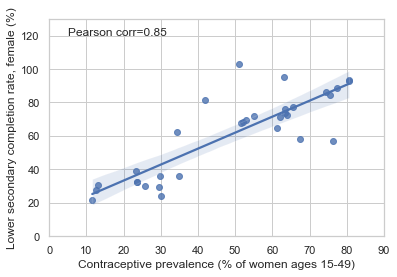

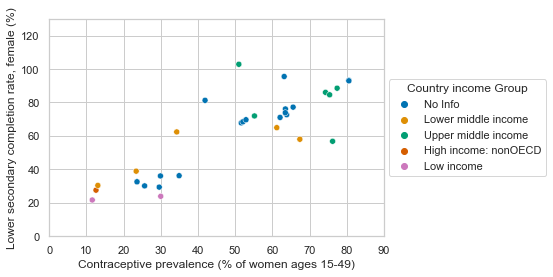

In [21]:
#Now that table is in correct format: Plot Scatter plot!
#As previously done, will use seaborn as it is more friendly for plotting multiple facets and coloring by groups 


#Calculate correlation between compared variables: will then add to plot
corr = np.corrcoef(tt['Value']['Contraceptive_prev'],tt['Value']['S_comp_rate_F'])[0,1]
corr = [np.round(corr, 2)]
#Place correlation value in variable text to plot it on the scatterplot
text = 'Pearson corr=%s' % (corr[0])




#Plot scatter plot:
##Important: tt is multiindex so need to define columns correctly

#Scatterplot 1 : all data
plot1 = plt.figure(1)

g=sns.regplot(data = tt, x = tt['Value']['Contraceptive_prev'], y = tt['Value']['S_comp_rate_F'])
g.text(5, 120, text, fontsize=12)
g.set(xlabel=indicator_contra[0], ylabel=indicator_edu[2])
g.axis([0, 90,0,130])

plt.savefig('S_comp_rate_F.png',orientation='landscape',bbox_inches='tight')

#Scatter plot 2 : color countries by income group

#Before plotting: replace Nan values in income group
tt['IncomeGroup2']= tt['IncomeGroup'].fillna('No Info')

plot1 = plt.figure(2)
g2=sns.scatterplot(data = tt, x = tt['Value']['Contraceptive_prev'], y = tt['Value']['S_comp_rate_F'],
               hue=tt['IncomeGroup2'],hue_order=tt['IncomeGroup2'].unique(),palette="colorblind")
#Place legend outside graph
g2.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1).set_title('Country income Group')
g2.set(xlabel=indicator_contra[0], ylabel=indicator_edu[2])
g2.axis([0, 90,0,130])


plt.savefig('S_comp_rate_F-colorIncome.png',orientation='landscape',bbox_inches='tight')


# indicator_contra = ['Contraceptive prevalence (% of women ages 15-49)']
# indicator_edu = ['Primary completion rate, female (%)','Primary completion rate, male (%)',
#                 'Lower secondary completion rate, female (%)','Lower secondary completion rate, male (%)']


plt.show()


##Note: Here I did plots manually but could define a function where the user defines the education level to compare against


In [22]:
#Take a look at countries for which there is no label on IncomeGroup:
#See if they more or less would have a similar income group than other labelled countries:
tt[tt.IncomeGroup2=="No Info"].sort_values([('Value','Contraceptive_prev')], ascending=[True]).head()

#They do:
#countries with lowest contraceptive prevalence values and low rates of education level completion are countries such a:
#Sub-Saharan Africa and Heavily indedebted countries, which could correspond to low-income countries

CountryName CountryCode  \
IndicatorName_Short                                                         
28                     Sub-Saharan Africa (all income levels)         SSF   
29                       Sub-Saharan Africa (developing only)         SSA   
12                     Heavily indebted poor countries (HIPC)         HPC   
17                                                 Low income         LIC   
10                   Fragile and conflict affected situations         FCS   

                     Year IncomeGroup              Value                \
IndicatorName_Short                   Contraceptive_prev P_comp_rate_F   
28                   2011         NaN          23.614918     65.074890   
29                   2011         NaN          23.625413     65.081863   
12                   2011         NaN          25.664510     60.856361   
17                   2011         NaN          29.598251     61.448639   
10                   2011         NaN          29.927776     63.849468   

                                                              IncomeGroup2  
IndicatorName_Short P_comp_rate_M S_comp_rate_F S_comp_rate_M               
28                      72.217285     32.572220     41.117092      No Info  
29                      72.229950     32.570919     41.119816      No Info  
12                      69.214531     30.112717     39.012047      No Info  
17                      69.649437     29.378824     38.661037      No Info  
10                      77.116898     36.054047     45.706100      No Info

### 3. Comparison of primary/secondary education level completion between males vs females for the year 2011

I have now confirmed that there is a strong positive correlation between Contraceptive prevalence and education level completion in both male and female population.

I will now end by exploring if there is a significant difference in education level completion between sexes, which could highlight if a certain sex would need even more attention towards education level completion.


In [23]:
#Boxplot comparing education level completion between sexes:


##Prepare data for plotting:

#Need to restack table in order to have a single Value column for education level completion
#Important: tt is multiindex so need to define columns correctly
tt3=tt.copy()
tt3.drop([('Value','Contraceptive_prev')], inplace=True, axis=1)
#Drop one of the education levels for plotting
tt3.drop([('Value','P_comp_rate_F')], inplace=True, axis=1)
tt3.drop([('Value','P_comp_rate_M')], inplace=True, axis=1)

# tt3.drop([('Value','S_comp_rate_F')], inplace=True, axis=1)
# tt3.drop([('Value','S_comp_rate_M')], inplace=True, axis=1)

tt3.head()

tt4=tt3.set_index(['CountryName','CountryCode','Year','IncomeGroup','IncomeGroup2']).stack().reset_index()



##Add sex to table as a column in order to color by this on barplot

#Test to see if split works on single text string:
# s='S_comp_rate_F'
# s.split('_')[-1]

#Get indicator name short list
strList=tt4['IndicatorName_Short']
#Extract string after last underscore (which corresponds to sex)
sex=[i.split('_')[-1] for i in strList]
#Create new column containing sex
tt4['Sex']=sex
tt4.head()



,CountryName,CountryCode,Year,IncomeGroup,IncomeGroup2,IndicatorName_Short,Value,Sex
0,Arab World,ARB,2011,NaN,No Info,S_comp_rate_F,67.789352,F
1,Arab World,ARB,2011,NaN,No Info,S_comp_rate_M,67.557098,M
2,Bangladesh,BGD,2011,Lower middle income,Lower middle income,S_comp_rate_F,64.937538,F
3,Bangladesh,BGD,2011,Lower middle income,Lower middle income,S_comp_rate_M,52.234459,M
4,Belize,BLZ,2011,Upper middle income,Upper middle income,S_comp_rate_F,71.929314,F


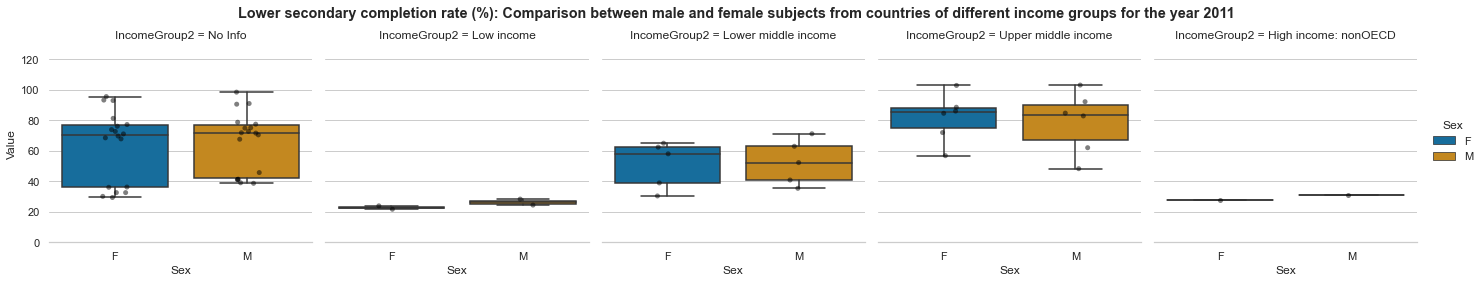

In [24]:
##Plot education level completion between males and females


#Plot an individual graph for each country income group
g = sns.FacetGrid(tt4,
            col='IncomeGroup2',
            sharex=True,
            sharey=True,
            height=4,
            col_order=['No Info','Low income', 'Lower middle income', 'Upper middle income','High income: nonOECD'])
#Draw boxplots plots: color by sex
g = g.map(sns.boxplot, 'Sex', 'Value','Sex',
        hue_order=np.unique(tt4["Sex"]), 
          order=np.unique(tt4["Sex"]),dodge=False,palette="colorblind")

#Add values as points in boxplots to better look at distribution of samples:
g = g.map(sns.stripplot,'Sex', 'Value',color="black",order=np.unique(tt4["Sex"]),alpha=0.5)

##Layout: Take out y axis line
g.despine(left=True)
#Set axis limits
g.set(ylim=(0,130))


#Set axes and legend labels. Set title
#g.set_axis_labels('Lower secondary completion rate completion rate(%)', "Value")
g.add_legend()
g.legend.set_title("Sex")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Lower secondary completion rate (%): Comparison between male and female subjects from countries of different income groups for the year 2011',weight='bold',ha='center')



plt.savefig('S_comp_rate_FvsM-boxplot.png',orientation='landscape',bbox_inches='tight')





In [25]:
#Define if differences observed in plot are statistically significant or not

#Although we did not look at this during the course, I wanted to evaluate if differences could be statistically significant
#Searching on the internet I found that a library to use for statistical analysis in Python is SciPy

#T.test comparing the mean education level completion rate betwee males vs females
from scipy import stats


#Define samples to be compared:
# male_edlevel=tt[tt.IncomeGroup2=='Lower middle income']['Value']['S_comp_rate_M'].values
# female_edlevel=tt[tt.IncomeGroup2=='Lower middle income']['Value']['S_comp_rate_M'].values

# male_edlevel=tt[tt.IncomeGroup2=='Upper middle income']['Value']['S_comp_rate_M'].values
# female_edlevel=tt[tt.IncomeGroup2=='Upper middle income']['Value']['S_comp_rate_M'].values

male_edlevel=tt['Value']['S_comp_rate_M'].values
female_edlevel=tt['Value']['S_comp_rate_M'].values


stats.ttest_ind(male_edlevel,female_edlevel) #Note: ttest_ind returns an array containing the calculated t.statistic and the associated p-value

##Conlusion:
#There was no significant difference in education level completion between male and female subjects for the year 2011

Ttest_indResult(statistic=0.0, pvalue=1.0)

## Step 4: Conclusion 

* It was confirmed that there is a **strong, negative correlation** between **adolescent fertility rate** (births per 1,000 women ages 15-19) and **contraceptive prevalence** (% of women ages 15-49) for the years 1990, 2000 and 2011 for different.  


* For the year 2011 and from an analysis on 32 countries of different income groups:

    * There is a **strong positive correlation** between **contraceptive prevalence** (% of women ages 15-49) and **primary or lower secondary level completion rate (%)** for both **male and female subjects**. 
    * There is no statistically significant difference of education level completion between male and female subjects.
 
From such results, we can highlight that **adolescent fertility rates** could be in part **related** to a **lower education level completion rate** (both primary and secondary) in both male and female subjects, due to a lower contraceptive prevalence. 


